# Traitement des données d'un questionnaire

Le jeu de données sera celui du Wellcome Trust passé par Gallup à travers le monde pour connaître l'attitude vis-à-vis de la science. Une question générale est alors : retrouve-t-on les mêmes tendances dans tous les pays ?

Les données ainsi que le rapport sont disponibles ici : https://wellcome.org/reports/wellcome-global-monitor-covid-19/2020





## Etape 1. Chargement et recodage

Lire une base de données SPSS

In [1]:
import pandas as pd # pandas
import pyshs # statistiques
import matplotlib.pyplot as plt #visualisations

# Enlever les warnings
pd.options.mode.chained_assignment = None  # default='warn'

si vous obtenez `ModuleNotFoundError` pour `pyshs`, pensez à faire `pip install pyshs` et ré-essayez.


Idem pour `pyreadstat`. En particulier si vous avez un Mac récent il faudra très probablement utiliser `conda install`, pip risque d'installer une version incompatible.

Tant qu'on y est, installons `seaborn` que nous utiliserons plus tard

In [2]:
# Il est possible de charger directement avec Pandas
df = pd.read_spss("./wgm-full-wave2-public-file.sav")

# Ou d'utiliser Pyreadstat pour avoir aussi les méta-données
import pyreadstat
df, meta = pyreadstat.read_sav('./wgm-full-wave2-public-file.sav')
df.shape

(119088, 89)

In [3]:
# meta.column_names_to_labels

Les métadonnées contiennent en particulier les labels associés aux numéros de catégories et l'explicitation des questions (par ex *meta.column_names_to_labels*).

Il est alors intéressant de définir deux petites fonctions qui permettent d'obtenir la question associée à une colonne et les labels associés

In [4]:
def question(v, meta):
    return meta.column_names_to_labels[v]

def modalites(v, meta):
    return meta.value_labels[meta.variable_to_label[v]]

# test
question("W1",meta)

'How Much You Know About Science'

In [5]:
#meta.column_names_to_labels

In [6]:
modalites("W7C", meta)

{1.0: 'A lot',
 2.0: 'Some',
 3.0: 'Not much',
 4.0: 'Not at all',
 99.0: 'DK/Refused'}

A partir de là, il est possible d'explorer le jeu de données et de commencer à 1/ identifier les questions qui nous intéressent et 2/ recoder les variables

**On va se concentrer sur la suisse**

Dans le cas d'une réflexion qui porte sur le rapport à la science : 

Variables dépendantes d'intérêt:

- 'W1': 'How Much You Know About Science'
- 'W2': 'How Much You Understand the Meaning of Science and Scientists'
- 'W6': 'Trust Science'
- **'W7C': 'Leaders in National Govt Value Opinions/Expertise of Scientists'**
- 'W8': 'Work of Scientists Benefits People in (Country)',
- 'W9': 'Work of Scientists Benefits People Like You in (Country)',
- 'WP21768': 'Agree to Be Vaccinated if Coronavirus Vaccine Was Available at No Cost
- **'MH4A': 'Important for National Govt to Fund Research on Cancer'**
- 'MH4B': 'Important for National Govt to Fund Research on Anxiety/Depression'

Variables indépendantes :
- 'Age': 'Age',
- 'Gender': 'Gender',
- 'Education': 'Education Level',
- 'Household_Income': 'Per Capita Income Quintiles',
- 'Global11Regions': 'Global regions used in report analysis',
- 'wbi': 'Country income level -- World Bank most recent definition',
- 'Subjective_Income': 'Feelings About Household Income',
- 'EMP_2010': 'Employment Status'}
- 'W27': 'Used Social Media in Past 30 Days',
- 'W28': 'How Often Use Social Media',
- 'W29': 'How Often See Information About Health on Social Media',
- 'W30': 'Believe Science or Teachings of Your Religion',
- 'WP21757': 'Extent Life Has Been Affected by Coronavirus Situation
- Différents items sur la confiance : 'W5A': 'Trust People in Neighborhood',
 'W5B': 'Trust the National Government in This Country',
 'W5C': 'Trust Scientists in This Country',
 'W5D': 'Trust Journalists in This Country',
 'W5E': 'Trust Doctors and Nurses in This Country',
 'W5F': 'Trust People Who Work at Charitable Organizations or NGOs in This Country',
 'W5G': 'Trust Traditional Healers in This Country',

Par ailleurs, comme  souvent, c'est une enquête pondérée avec les poids : 'WGT'

## Créer un sous-jeu de données sur la suisse

In [7]:
df["COUNTRYNEW"].unique()

array(['United States', 'Egypt', 'Morocco', 'Lebanon', 'Saudi Arabia',
       'Jordan', 'Turkey', 'Indonesia', 'Bangladesh', 'United Kingdom',
       'France', 'Germany', 'Netherlands', 'Belgium', 'Spain', 'Italy',
       'Poland', 'Hungary', 'Czech Republic', 'Romania', 'Sweden',
       'Greece', 'Denmark', 'Iran', 'Hong Kong', 'Japan', 'China',
       'India', 'Venezuela', 'Brazil', 'Mexico', 'Nigeria', 'Kenya',
       'Tanzania', 'Israel', 'Ghana', 'Uganda', 'Benin', 'South Africa',
       'Canada', 'Australia', 'Philippines', 'Sri Lanka', 'Vietnam',
       'Thailand', 'Cambodia', 'Laos', 'Myanmar', 'New Zealand',
       'Ethiopia', 'Mali', 'Senegal', 'Zambia', 'South Korea', 'Taiwan',
       'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Russia',
       'Ukraine', 'Burkina Faso', 'Cameroon', 'Zimbabwe', 'Costa Rica',
       'Albania', 'Algeria', 'Argentina', 'Austria', 'Bahrain', 'Bolivia',
       'Bosnia Herzegovina', 'Bulgaria', 'Chile', 'Colombia',
       'Congo Brazzaville'

In [8]:
data = df[df["COUNTRYNEW"]=="Switzerland"]

### Regarder chaque variable pour la recoder comme on le souhaite

Cas de la place de la science dans la décision politique

In [9]:
data["W7C"].fillna("NA").value_counts()

2.0     604
1.0     247
3.0     115
4.0      31
99.0      3
Name: W7C, dtype: int64

Il y a des valeurs nulles et les labels ne sont pas explicites

In [10]:
modalites("W7C",meta)

{1.0: 'A lot',
 2.0: 'Some',
 3.0: 'Not much',
 4.0: 'Not at all',
 99.0: 'DK/Refused'}

Un recodage trichotomique

In [11]:
data["relation_science_politiques"] = data["W7C"].replace({1:"1-A lot",2:"2-Some",
                                                           3:"3-Not much or not at all",
                                                           4:"3-Not much or not at all",99:"4-NA"}).fillna("4-NA")

In [12]:
data["relation_science_politiques"].value_counts(normalize=True)

2-Some                      0.604
1-A lot                     0.247
3-Not much or not at all    0.146
4-NA                        0.003
Name: relation_science_politiques, dtype: float64

Autre variable, juste avec les labels de base

In [13]:
modalites("MH4A", meta)

{1.0: 'Extremely important',
 2.0: 'Somewhat important',
 3.0: 'Not too important',
 4.0: 'Not important at all',
 99.0: 'DK/Refused'}

In [14]:
data["recherche_cancer"] = data['MH4A'].replace(modalites("MH4A", meta)).fillna("NA")
data["recherche_cancer"].value_counts()

Extremely important     711
Somewhat important      273
Not too important        12
DK/Refused                2
Not important at all      2
Name: recherche_cancer, dtype: int64

Recodage d'une variable quantitative

In [15]:
data["age_reco"] = pd.cut(data['Age'], [0,25,35,45,55,65,100],
                labels = ["0-[15-25[","1-[25-35[","2-[35-45[","3-[45-55[","4-[55-65[","5-[65-75]"])
data["age_reco"].value_counts(normalize=True).sort_index()

0-[15-25[    0.068
1-[25-35[    0.132
2-[35-45[    0.207
3-[45-55[    0.194
4-[55-65[    0.168
5-[65-75]    0.231
Name: age_reco, dtype: float64

L'idée est alors de faire ce traitement pour chacune des variables, en vérifiant graduellement. Et à la fin de rassembler toutes les étapes de codage dans un même bloc comme ci-dessous

In [16]:
# Recodage des variables utilisées - importance des labels explicits
# data, meta = pyreadstat.read_sav('./wgm-full-wave2-public-file.sav')

data["poids"] = data["WGT"]

data["pays"] = data["COUNTRYNEW"]
data["age"] = data["Age"].fillna("NA")
data["age_reco"] = pd.cut(data['Age'],[0,35,45,55,65,100],
                labels = ["1-[15-35[","2-[35-45[","3-[45-55[","4-[55-65[","5-[65-75]"])
data["genre"] = data["Gender"].replace({1.0: '1-Male', 2.0: '2-Female'})
data["education"] = data["Education"].replace(modalites('Education',meta))
data["revenus"] = data["Household_Income"].replace({1.0: 'Q1', 2.0: 'Q2',3:"Q3",4:"Q4",5:"Q5"})
data["region"] = data["Global11Regions"].replace(modalites("Global11Regions",meta))
data["revenus_avis"] = data["Subjective_Income"].replace(modalites("Subjective_Income",meta))

reco = {1:"1-A lot", 2:"2-Some", 3:"3-Not much/at all",4:"3-Not much/at all",99:"4-NA"}
data["connaissance_science"] = data['W1'].replace(reco)
data["comprendre_science"] = data['W2'].replace(reco)
data["education_science"] = data["W3"].replace(modalites('W3',meta))
data["confiance_hopital"] = data["W4"].replace(reco)
data["confiance_science"] = data["W6"].replace(reco)
data["confiance_gouvernement"] = data["W5B"].replace(reco)
data["confiance_scientifiques"] = data["W5C"].replace(reco)
data["confiance_journalistes"] = data["W5D"].replace(reco)
data["confiance_medecins"] = data["W5E"].replace(reco)
data["confiance_rebouteux"] = data["W5G"].replace(reco)
data["recherche_cancer"] = data['MH4A'].replace(modalites("MH4A",meta)).fillna("NA")

reco = {1:"1-A lot", 2:"2-Some", 3:"3-Not much/at all",4:"3-DK",8:"3-DK",9:"3-DK"}
data["covid_impact"] = data["WP21757"].replace(reco)


data["gouvernants_valorisent_scientifiques"] = data["W7C"].replace(reco)

data["socialmedia_month"] = data["W27"].replace(modalites("W27",meta))
reco = {1.0: '1-Almost every hour',2.0: '1-Almost every hour',3.0: '2-At least once a day',
 4.0: '2-At least once a day', 5.0: '3-A few days a week', 6.0: '4-Less frequently', 99.0: '5-DK/Refused'}
data["socialmedia_freq"] = data["W28"].replace(reco)
reco = {1:"1-Très souvent ou tout le temps",2:"1-Très souvent ou tout le temps",3:"2-Parfois",4:"3-Jamais",99:"NA"}
data["socialmedia_healthinfo"] = data["W29"].replace(reco)

data["science_religion"] = data["W30"].replace(modalites("W30",meta))
data["vaccin"] = data["WP21768"].replace(modalites("WP21768",meta))

data["scientists_benefits_people"] = data["W8"].replace({1:"1-Yes",2:"2-Some",3:"3-No",99:"4-NA"})
data["scientists_benefits_you"] = data["W9"].replace({1:"1-Yes",2:"2-Some",3:"3-No",99:"4-NA"})

In [17]:
modalites("WP21757",meta)

{1.0: 'A lot',
 2.0: 'Some',
 3.0: 'Not at all',
 4.0: '(Never heard of it)',
 8.0: '(DK)',
 9.0: '(Refused)'}

Si au cours de l'analyse, de nouvelles variables sont utilisées, il est facile de rajouter les variables dans ce bloc pour qu'elles puissent être intégrées

## Etape 2. Nettoyage et exploration

Cette étape recoupe la précédente car elle relève aussi largement de l'identification des bonnes variables.

Par exemple, deux questions que nous pouvons nous poser :

1. Est-ce qu'on considère les différentes réponses de question sur la confiance individuellement ou est-ce qu'on construit un indicateur
2. Est-ce que les deux questions sur la confiance dans les scientifiques du pays, et la confiance dans la science en général, est la même chose

In [18]:
modalites('W5A', meta)

{1.0: 'A lot',
 2.0: 'Some',
 3.0: 'Not much',
 4.0: 'Not at all',
 99.0: 'DK/Refused'}

In [19]:
data[['W5A', 'W5B', 'W5C', 'W5D', 'W5E', 'W5F', 'W5G']].describe()

,W5A,W5B,W5C,W5D,W5E,W5F,W5G
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,1.758000,1.636000,2.179000,2.64300,1.298000,2.771000,4.24400
std,4.432277,4.411005,8.721986,8.69328,3.130974,9.717458,13.22972
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000
25%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.00000
50%,1.000000,1.000000,1.000000,2.00000,1.000000,2.000000,2.00000
75%,2.000000,2.000000,2.000000,2.00000,1.000000,2.000000,3.00000
max,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.00000


In [20]:
# Corrélation entre les indicateurs avec Pandas en enlevant les valeurs absentes
corr = data[['W5A', 'W5B', 'W5C', 'W5D', 'W5E', 'W5F', 'W5G']].replace({99:0}).corr()
corr

,W5A,W5B,W5C,W5D,W5E,W5F,W5G
W5A,1.000000,0.134102,0.113683,0.042805,0.117842,0.120539,0.075058
W5B,0.134102,1.000000,0.054839,0.069413,0.119104,0.073940,0.033541
W5C,0.113683,0.054839,1.000000,0.093983,0.162107,0.079782,0.026480
W5D,0.042805,0.069413,0.093983,1.000000,0.052399,0.052253,0.072482
W5E,0.117842,0.119104,0.162107,0.052399,1.000000,0.059594,0.005487
W5F,0.120539,0.073940,0.079782,0.052253,0.059594,1.000000,0.141221
W5G,0.075058,0.033541,0.026480,0.072482,0.005487,0.141221,1.000000


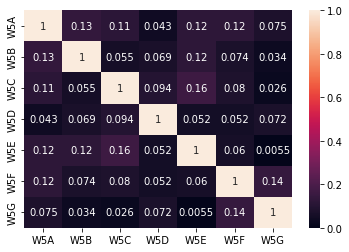

In [21]:
# Le rendre un peu plus joli avec Seaborn
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
import seaborn as sns
heatmap = sns.heatmap(corr, vmin=0, vmax=1, annot=True)

Lien entre les deux questions : on fait un tableau croisé

In [22]:
pd.crosstab(data["confiance_science"], data["confiance_scientifiques"],margins=True)

confiance_scientifiques,1-A lot,2-Some,3-Not much/at all,4-NA,All
confiance_science,,,,,
1-A lot,365,107,16,2,490
2-Some,250,142,21,6,419
3-Not much/at all,44,22,17,0,83
4-NA,5,3,0,0,8
All,664,274,54,8,1000


On peut le représenter sur un tableau croisé

<AxesSubplot:xlabel='confiance_science'>

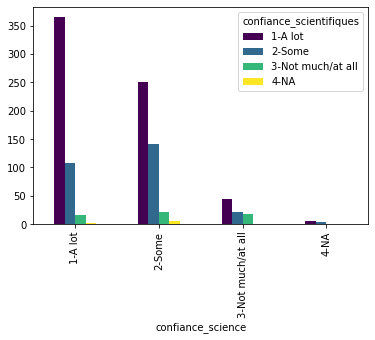

In [23]:
pd.crosstab(data["confiance_science"],data["confiance_scientifiques"]).plot(kind="bar", cmap="viridis")

Cela ne coincide pas exactement. On va donc créer une typologie pour notre analyse :
- confiance dans la science (W4 = 1,2), mais pas confiance dans les scientifiques (W5D=3,4)
- confiance dans les scientifiques, mais pas dans la science (l'inverse)
- pas confiance dans la science ni les scientifiques
- confiance dans les deux
- si une valeur manque, NA

In [24]:
def reco(ligne):
    if (ligne["W4"]==99) | (ligne["W5D"]==99):
        return "NA"
    if (ligne["W4"] in [1,2]) & (ligne["W5D"] in [3,4]):
        return "1-Confiance science mais pas les scientifiques"
    if (ligne["W4"] in [3,4]) & (ligne["W5D"] in [1,2]):
        return "2-Confiance scientifiques mais pas dans la science"
    if (ligne["W4"] in [1,2]) & (ligne["W5D"] in [1,2]):
        return "3-Confiance science"
    if (ligne["W4"] in [3,4]) & (ligne["W5D"] in [3,4]):
        return "4-Méfiance science" 
    
data["confiance_science_scientifiques"] = data.apply(reco,axis=1)
data["confiance_science_scientifiques"].value_counts()

3-Confiance science                                   782
1-Confiance science mais pas les scientifiques        161
2-Confiance scientifiques mais pas dans la science     41
NA                                                     10
4-Méfiance science                                      6
Name: confiance_science_scientifiques, dtype: int64

## Etape 3. Production de données statistiques

Dans le cas ici, on a des données qui sont en plus structurées par pays. Il faut donc penser des traitements par pays (par exemple sur la France) et des comparaisons

### Exploration du cas de la France

Construction d'un sous-corpus

In [31]:
data_fr = df[df["COUNTRYNEW"]=="France"]
data_fr

,COUNTRYNEW,WPID_RANDOM,WGT,PROJWT,FIELD_DATE,YEAR_WAVE,W1,W2,W3,W4,...,age_var1,age_var2,age_var3,Gender,Education,Household_Income,Global11Regions,wbi,Subjective_Income,EMP_2010
10104,France,186458200.0,0.423835,23289.899282,2020-11-01,2020.0,2.0,2.0,3.0,1.0,...,3.0,3.0,4.0,1.0,2.0,2.0,1.0,4.0,2.0,1.0
10105,France,203621833.0,0.453261,24906.841470,2020-11-01,2020.0,2.0,2.0,2.0,1.0,...,3.0,3.0,4.0,2.0,3.0,2.0,1.0,4.0,1.0,1.0
10106,France,138549237.0,0.297951,16372.518581,2020-11-01,2020.0,2.0,2.0,3.0,2.0,...,3.0,3.0,4.0,2.0,2.0,5.0,1.0,4.0,1.0,1.0
10107,France,208005111.0,0.297951,16372.518581,2020-11-01,2020.0,1.0,2.0,2.0,2.0,...,3.0,3.0,4.0,1.0,3.0,2.0,1.0,4.0,1.0,2.0
10108,France,195476303.0,0.403065,22148.600751,2020-11-01,2020.0,3.0,3.0,3.0,1.0,...,3.0,4.0,4.0,1.0,3.0,3.0,1.0,4.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11099,France,117770525.0,1.686740,92686.991284,2020-11-01,2020.0,2.0,1.0,2.0,3.0,...,3.0,3.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0,4.0
11100,France,120224611.0,0.676228,37158.988617,2020-11-01,2020.0,2.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,2.0,5.0,1.0,4.0,1.0,1.0
11101,France,162778803.0,1.446545,79488.184787,2020-11-01,2020.0,2.0,1.0,2.0,1.0,...,3.0,4.0,4.0,2.0,2.0,5.0,1.0,4.0,2.0,6.0
11102,France,133194152.0,0.772417,42444.606002,2020-11-01,2020.0,1.0,2.0,3.0,2.0,...,2.0,2.0,3.0,1.0,2.0,5.0,1.0,4.0,1.0,1.0


In [32]:
data.columns[-30:]

Index(['recherche_cancer', 'age_reco', 'poids', 'pays', 'age', 'genre',
       'education', 'revenus', 'region', 'revenus_avis',
       'connaissance_science', 'comprendre_science', 'education_science',
       'confiance_hopital', 'confiance_science', 'confiance_gouvernement',
       'confiance_scientifiques', 'confiance_journalistes',
       'confiance_medecins', 'confiance_rebouteux', 'covid_impact',
       'gouvernants_valorisent_scientifiques', 'socialmedia_month',
       'socialmedia_freq', 'socialmedia_healthinfo', 'science_religion',
       'vaccin', 'scientists_benefits_people', 'scientists_benefits_you',
       'confiance_science_scientifiques'],
      dtype='object')

#### Tri à plats

In [34]:
pyshs.tri_a_plat(data_fr, "confiance_science_scientifiques","poids")

Attention, la variable n'est pas dans le tableau


In [45]:
data_fr

Index(['recherche_cancer', 'age_reco', 'poids', 'pays', 'age', 'genre',
       'education', 'revenus', 'region', 'revenus_avis',
       'connaissance_science', 'comprendre_science', 'education_science',
       'confiance_hopital', 'confiance_science', 'confiance_gouvernement',
       'confiance_scientifiques', 'confiance_journalistes',
       'confiance_medecins', 'confiance_rebouteux', 'covid_impact',
       'gouvernants_valorisent_scientifiques', 'socialmedia_month',
       'socialmedia_freq', 'socialmedia_healthinfo', 'science_religion',
       'vaccin', 'scientists_benefits_people', 'scientists_benefits_you',
       'confiance_science_scientifiques'],
      dtype='object')

In [42]:
tableau = {
    "Confiance Science":pyshs.tri_a_plat(data_fr,"confiance_science","poids"),
    "Confiance Scientifiques":pyshs.tri_a_plat(data_fr,"confiance_scientifiques","poids"),
    "Confiance Hopital":pyshs.tri_a_plat(data_fr,"confiance_hopital","poids"),
    "Confiance Médecins":pyshs.tri_a_plat(data_fr,"confiance_medecins","poids"),
    "Confiance Gouvernement":pyshs.tri_a_plat(data_fr,"confiance_gouvernement","poids"),
}
pd.concat(tableau,axis=1)

Confiance Science                 Confiance Scientifiques  \
                  Effectif redressé Pourcentage (%)       Effectif redressé   
1-A lot                       558.9            55.9                   584.0   
2-Some                        382.2            38.2                   336.5   
3-Not much/at all              52.7             5.3                    73.6   
4-NA                            6.2             0.6                     5.9   
Total                        1000.0           100.0                  1000.0   

                                  Confiance Hopital                  \
                  Pourcentage (%) Effectif redressé Pourcentage (%)   
1-A lot                      58.4             685.1            68.5   
2-Some                       33.6             250.2            25.0   
3-Not much/at all             7.4              61.1             6.1   
4-NA                          0.6               3.7             0.4   
Total                       100.0            1000.1           100.0   

                  Confiance Médecins                 Confiance Gouvernement  \
                   Effectif redressé Pourcentage (%)      Effectif redressé   
1-A lot                        827.9            82.8                  216.7   
2-Some                         141.5            14.2                  346.6   
3-Not much/at all               28.2             2.8                  429.9   
4-NA                             2.4             0.2                    6.8   
Total                         1000.0           100.0                 1000.0   

                                   
                  Pourcentage (%)  
1-A lot                      21.7  
2-Some                       34.7  
3-Not much/at all            43.0  
4-NA                          0.7  
Total                       100.1

In [62]:
pyshs.tri_a_plat(data_fr,"comprendre_science","poids")

,Effectif redressé,Pourcentage (%)
1-A lot,494.3,49.4
2-Some,369.6,37.0
3-Not much/at all,134.9,13.5
4-NA,1.1,0.1
Total,999.9,100.0


### Tableau croisé

In [49]:
var_ind = {"genre":"Genre","age_reco":"Age","socialmedia_month":"Usage Réseaux Sociaux",
           "education":"Diplome","revenus":"Revenus","covid_impact":"Impact du COVID"}

In [54]:
pyshs.tableau_croise_multiple(data,"confiance_hopital",var_ind,"poids")

1-A lot  \
Variable                          Modalités                                             
Genre (p = 0.497)                 1-Male                                369.1 (78.5%)   
                                  2-Female                              419.0 (79.0%)   
                                  Total                                 788.1 (78.8%)   
Age (p = 0.057)                   1-[15-35[                             219.1 (79.3%)   
                                  2-[35-45[                             145.7 (82.1%)   
                                  3-[45-55[                             159.1 (81.6%)   
                                  4-[55-65[                             108.3 (75.1%)   
                                  5-[65-75]                             155.9 (75.2%)   
                                  Total                                 788.1 (78.8%)   
Usage Réseaux Sociaux (p = 0.006) No                                    299.3 (84.0%)   
                                  Yes                                   488.8 (75.9%)   
                                  Total                                 788.1 (78.8%)   
Diplome (p = 0.008)               99.0                                   2.4 (100.0%)   
                                  Elementary or less (8 years or less)  129.0 (70.1%)   
                                  Secondary (8-15 years)                338.8 (79.7%)   
                                  Tertiary (16+ years)                  317.8 (81.8%)   
                                  Total                                 788.1 (78.8%)   
Revenus (p = 0.045)               Q1                                    164.8 (82.5%)   
                                  Q2                                    153.7 (77.7%)   
                                  Q3                                    165.0 (81.7%)   
                                  Q4                                    141.7 (71.0%)   
                                  Q5                                    162.9 (81.0%)   
                                  Total                                 788.1 (78.8%)   
Impact du COVID (p = 0.127)       1-A lot                               231.7 (82.3%)   
                                  2-Some                                398.4 (77.5%)   
                                  3-DK                                   13.1 (90.3%)   
                                  3-Not much/at all                     144.8 (76.2%)   
                                  Total                                 788.1 (78.8%)   

                                                                               2-Some  \
Variable                          Modalités                                             
Genre (p = 0.497)                 1-Male                                 81.6 (17.4%)   
                                  2-Female                               81.7 (15.4%)   
                                  Total                                 163.3 (16.3%)   
Age (p = 0.057)                   1-[15-35[                              48.8 (17.7%)   
                                  2-[35-45[                              22.6 (12.7%)   
                                  3-[45-55[                              31.8 (16.3%)   
                                  4-[55-65[                              24.7 (17.1%)   
                                  5-[65-75]                              35.5 (17.1%)   
                                  Total                                 163.3 (16.3%)   
Usage Réseaux Sociaux (p = 0.006) No                                     41.4 (11.6%)   
                                  Yes                                   121.9 (18.9%)   
                                  Total                                 163.3 (16.3%)   
Diplome (p = 0.008)               99.0                                     0.0 (0.0%)   
                                  Elementary or less (8 years or less)  